In [37]:
import serial
%matplotlib notebook
import numpy as np
import time
import matplotlib.pyplot as plt

In [8]:
ser = serial.Serial('/dev/ttyACM0')


<IPython.core.display.Javascript object>


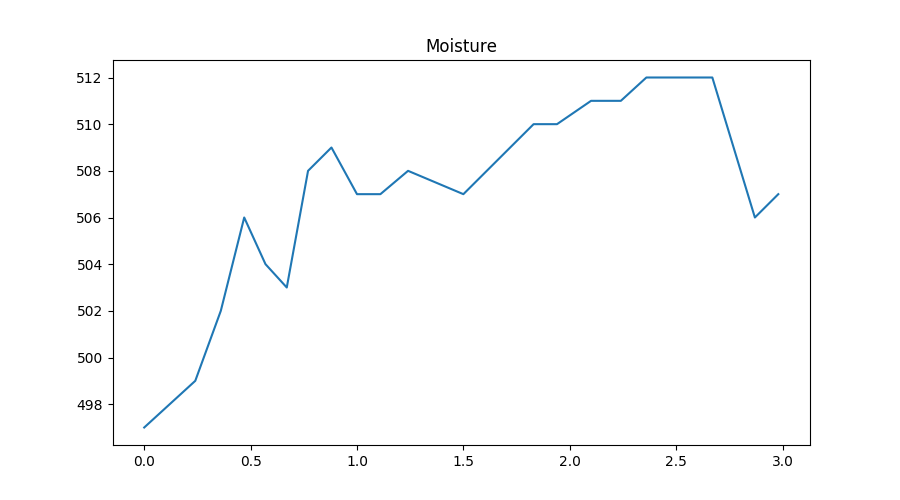

Keyboard Interrupt


In [63]:
ser.flushInput()
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_title("Moisture")
ax.set_xlabel('time (s)')
ax.set_ylabel('Moisture')
plt.ion()
moistlog = []
timelog = []
start = time.time()
while True:
    try:
        ser_bytes = ser.readline()
        decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
        moistlog.append(decoded_bytes) 
        timelog.append(round(time.time()- start, 2))
        if len(moistlog) > 100:
            del moistlog[0]
            del timelog[0]
        
        ax.clear()
        ax.plot(timelog, moistlog)
        ax.set_title("Moisture")
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Moisture')
        fig.canvas.draw()
    except KeyboardInterrupt:
        print("Keyboard Interrupt")
        break